[*********************100%%**********************]  1 of 1 completed

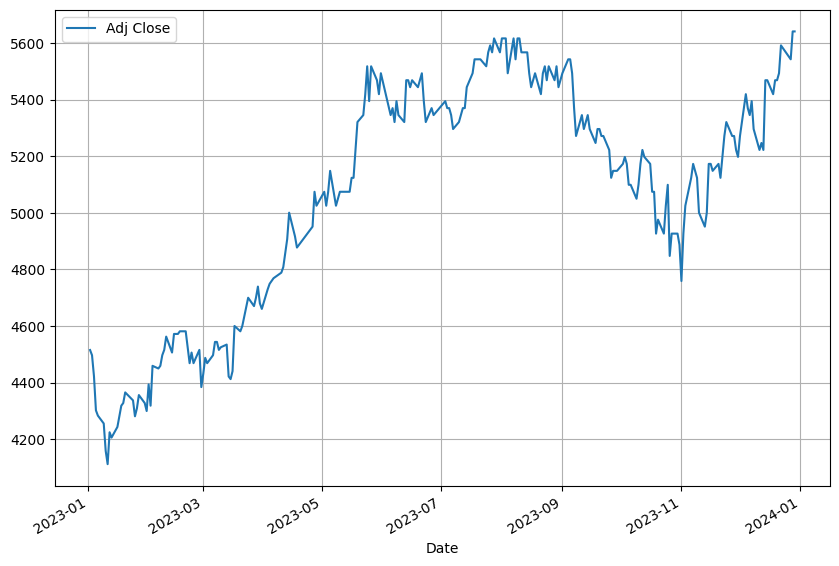

In [12]:
import yfinance as yf
import matplotlib.pyplot as plt

df = yf.download('BBRI.JK','2023-01-01', '2023-12-31')
df['Adj Close'].plot(figsize=(10,7))
plt.legend()
plt.grid()
plt.show()

In [13]:
import math

df = yf.download('BBRI.JK','2023-01-01', '2023-12-31')
#calculate the compound annual growth rate (CAGR) which 
#will give us our mean return input (mu) 
days = (df.index[-1] - df.index[0]).days
cagr = ((((df['Adj Close'][-1]) / df['Adj Close'][1])) ** (365.0/days)) - 1
print ('CAGR =',str(round(cagr,4)*100)+"%")
mu = cagr
#create a series of percentage returns and calculate 
#the annual volatility of returns
df['Returns'] = df['Adj Close'].pct_change()
vol = df['Returns'].std()*math.sqrt(252)
print ("Annual Volatility =",str(round(vol,4)*100)+"%")

[*********************100%%**********************]  1 of 1 completed
CAGR = 25.759999999999998%
Annual Volatility = 20.96%


C:\Users\Mahardika\AppData\Local\Temp\ipykernel_27480\2583295592.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cagr = ((((df['Adj Close'][-1]) / df['Adj Close'][1])) ** (365.0/days)) - 1


C:\Users\Mahardika\AppData\Local\Temp\ipykernel_27480\1962824998.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S = df['Adj Close'][-1] #starting stock price (i.e. last available real stock price)


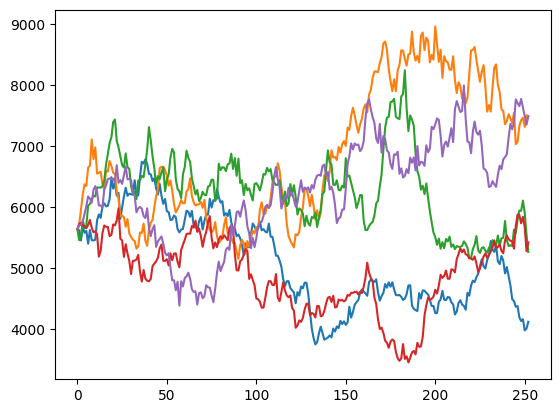

In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
#Define Variables
S = df['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.2309 #Return
vol = 0.4259 #Volatility
#choose number of runs to simulate - I have chosen 1000
for i in range(5):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
#show the plot of multiple price series created above
plt.show()

C:\Users\Mahardika\AppData\Local\Temp\ipykernel_27480\2441702063.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S = df['Adj Close'][-1] #starting stock price (i.e. last available real stock price)


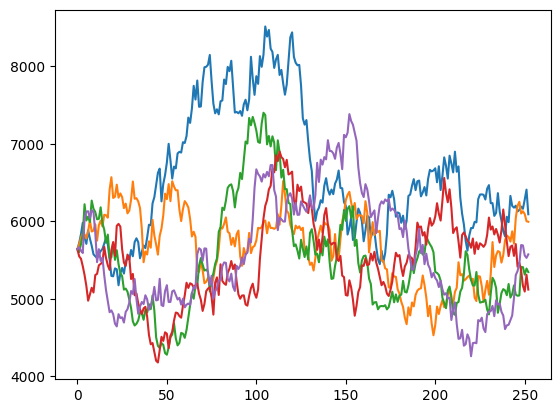

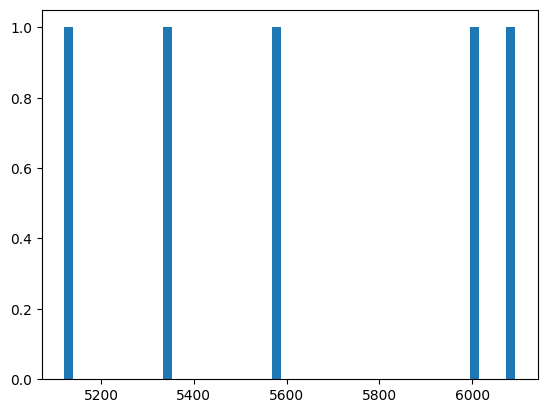

In [18]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
#set up empty list to hold our ending values for each simulated price series
result = []
#Define Variables
S = df['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.2309 #Return
vol = 0.4259 #Volatility
#choose number of runs to simulate - I have chosen 10,000
for i in range(5):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
    
    #append the ending value of each simulated run to the empty list we created at the beginning
    result.append(price_list[-1])
#show the plot of multiple price series created above
plt.show()
#create histogram of ending stock values for our mutliple simulations
plt.hist(result,bins=50)
plt.show()